<a href="https://colab.research.google.com/github/Altaieb-Mohammed/lab_2corse/blob/master/lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Загрузка датасета (пример с AirPassengers, можно заменить на свой)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'])

print(df.head())


       Month  Passengers
0 1949-01-01         112
1 1949-02-01         118
2 1949-03-01         132
3 1949-04-01         129
4 1949-05-01         121


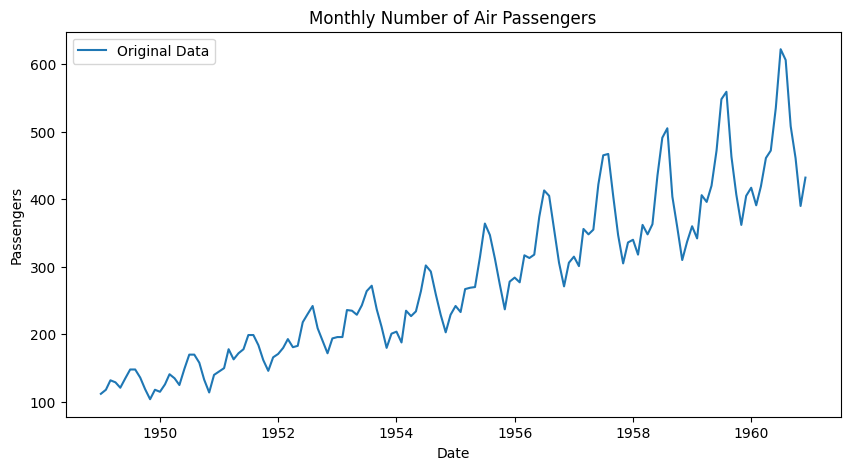

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['Month'], df['Passengers'], label='Original Data')
plt.title('Monthly Number of Air Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()


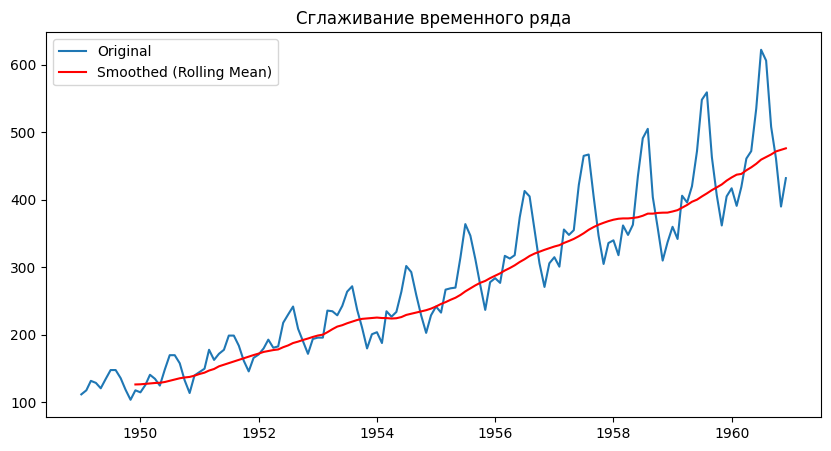

In [3]:
window = 12  # годовое сглаживание
df['Smoothed'] = df['Passengers'].rolling(window=window).mean()

plt.figure(figsize=(10, 5))
plt.plot(df['Month'], df['Passengers'], label='Original')
plt.plot(df['Month'], df['Smoothed'], label='Smoothed (Rolling Mean)', color='red')
plt.legend()
plt.title('Сглаживание временного ряда')
plt.show()


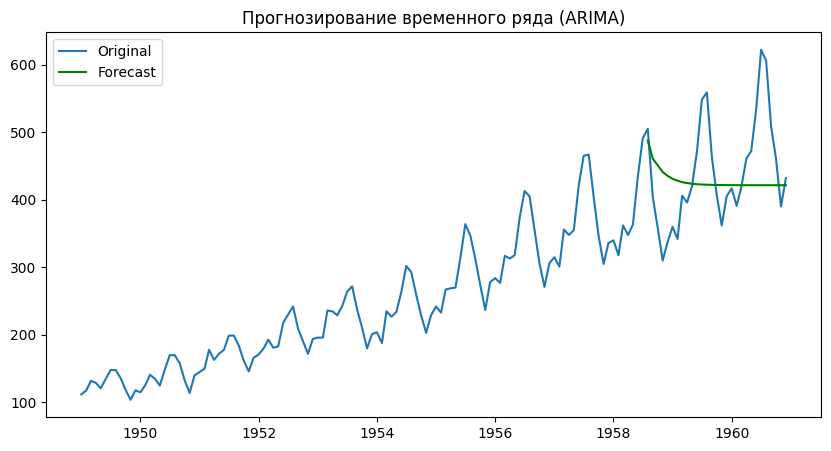

In [4]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Разделим данные на train/test
train_size = int(len(df) * 0.8)
train, test = df['Passengers'][:train_size], df['Passengers'][train_size:]

# Обучаем ARIMA (параметры можно подобрать)
model = ARIMA(train, order=(2,1,2))
model_fit = model.fit()

# Прогнозируем на тестовой части
forecast = model_fit.forecast(steps=len(test))
forecast = forecast.values

# Визуализация прогноза
plt.figure(figsize=(10, 5))
plt.plot(df['Month'], df['Passengers'], label='Original')
plt.plot(df['Month'][train_size:], forecast, label='Forecast', color='green')
plt.legend()
plt.title('Прогнозирование временного ряда (ARIMA)')
plt.show()


In [5]:
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Mean Squared Error (MSE): 6808.40
Mean Absolute Error (MAE): 63.55
